# Final Project: Movie Script Analysis ( QT & Disney )
## Pre-cleaning and Parsing:
### QTs:


In [1]:
import os
import re
import numpy as np
import pandas as pd

qts = [os.path.join("data/QT", p) for p in os.listdir("data/QT")]

def clean_data(text):
    text = re.sub('\n','',text)
    text1 = re.sub("'s",' is',text)
    text2 = re.sub("'m",' am', text1)
    text3 = re.sub("n't", ' not', text2)
    text4 = re.sub("'ll", ' will', text3)
    text5 = re.sub("'ve", ' have', text4)
    return text5


qt_data = []
for p in qts:
    with open(p) as f:
        content = ""
        for line in f:
            line = line.strip().lower()
            line = " ".join(line.split("\n"))
            line = clean_data(line)
            line = re.sub(r"\s+", " ", line) 
            line = re.sub(r"\t+", " ", line)
            line = line.strip().replace(u'\u3000', u'').replace(u'\xa0', u'')
            # '\a0': 不间断空白符、'\u3000': 特殊空白符
            # https://www.cnblogs.com/zqifa/p/python-9.html
            line = re.sub('[^A-Za-z ]*','',line)
            content  += " " + line
        content = " ".join([w for w in content.split(" ") if len(w)>0])
        qt_data.append(content)




In [2]:
# stemmer

from nltk.stem import PorterStemmer
def clean_article(text):
    ps = PorterStemmer()
    text_new = ps.stem(text) 
    return text_new

qt = []
for i in range(len(qt_data)):
    qt.append(clean_article(qt_data[i]))

In [3]:
stopwords_qt = ['django','rider','dicky','speck','ace','le','schultz','saloon','keeper','sheriff','sharp','marshall',
                'tatum','zz','spencer','betina','scotty','broomhilda','narrator','vo','calvin','candie','stephen','woody',
                'german','lara','lee','flody','jano','bennett','chester','icz','billy','crash','ted','guy','betty','elspeth',
                'kiva','athena','raven','eva','jezabel','yuppie','scum','sigfried','juancho','sarah','margaret','angela',
                'leo','norman','mcgraw','pete','seth','richard','jacob','scott','kate','kelly','houge','santanico','frost',
                'carlos','farmer','julie','perrier','col','landa','charlotte','driver','lt','aldo','butz','pvt','shosanna',
                'marcel','goebbels','narrator','fredrick','zoller','bridget','hellstorm','hicox','stiglitz','wicki','wilhelm',
                'willi','italian','donowitz','sidney','ordell','louis','jackie','melanie','nicolet','dargus','max','sheronda',
                'wanda','amy','beaumont','bill','housewife','vernita','elle','bride','orderly','slam','sushi','chef','budd','pai',
                'mei','mickey','mabel','earl','mallory','mcclusky','scagnetti','wurlizter','sonny','wayne','russell','steve',
                'simon','jeff','movie','jessie','otis','young','man','woman','jody','lance','vincent','jules','brett','butch',
                'mia','esmarelda','fabienne','maynard','zed','jimmie','wolf','pumpkin','yolanda','mr','pink','white','blue','joe',
                'brown','orange','blonde','eddie','vic','cop','holdaway','freddy','jodie','lucy','clarence','drexl','d','cliff',
                'alabama','dick','coccotti','marty','elvis','elliot','lenny','marvin','dimes','dario'] # characters' name in QT's movies



In [4]:
# remove stopwords

from nltk.corpus import stopwords

stop = stopwords.words('english')

def rm_swqt (text):
    new = []
    for i in range(len(text)):
        new1 = ''
        for word in text[i].split(" "):
            if word not in stop:
                if word not in stopwords_qt:
                    new1 += word  + " "
        new.append(new1)
    return new
                



In [5]:
qt_cleaned_data = rm_swqt(qt) # QT's cleaned data

### Disneys:

In [6]:
disney = [os.path.join("data/Disney", p) for p in os.listdir("data/Disney")]

def clean_data(text):
    text = re.sub('\n','',text)
    text1 = re.sub("'s",' is',text)
    text2 = re.sub("'m",' am', text1)
    text3 = re.sub("n't", ' not', text2)
    text4 = re.sub("'ll", ' will', text3)
    text5 = re.sub("'ve", ' have', text4)
    return text5


disney_data = []
for p in disney:
    with open(p) as f:
        content = ""
        for line in f:
            line = line.strip().lower()
            line = " ".join(line.split("\n"))
            line = clean_data(line)
            line = re.sub(r"\s+", " ", line) 
            line = re.sub(r"\t+", " ", line)
            line = line.strip().replace(u'\u3000', u'').replace(u'\xa0', u'') # 去除‘\t’ 也无法去除的空格
            line = re.sub('[^A-Za-z ]*','',line)
            content  += " " + line
        content = " ".join([w for w in content.split(" ") if len(w)>0])
        disney_data.append(content)




In [7]:
# stemmer

disney = []
for i in range(len(disney_data)):
    disney.append(clean_article(disney_data[i]))

In [8]:
stopwords_disney = ['mulan','guard','shan','yu','li','chi','fu','general','emperor','fa','hair','dresser',
                   'chorus','maiden','zhou','grandma','matchmaker','mushu','shang','ancestor','barry','cook','hun','ling',
                   'yao','chien','po','cri','kee','jafar','peddler','gazeem','aladdin','guardus','iago','prince','sultan',
                   'proprietor','abu','cave','jasmine','shopkeeper','genie','chorus','narrator','maid','majordomo','footman',
                   'jean','belle','villagers','clothilde','tom','dick','pere','robert','apothecary','gaston','diva','vagrant',
                   'lefou','maurice','nasty','chip','lasses','lumiere','chandelier','beast','plumette','potts','mrs',
                   'cadenza','cogsworth','tavern','marlin','coral','nemo','bob','pearl','sheldon','ray','mr','tad','dory',
                   'bruce','anchor','chum','nigel','bubbles','gurgle','bloat','patient','deb','peach','gill','jacques',
                   'crush','squirt','crab','gull','darla','ice','harvesters','anna','elsa','young','queen','king','kristoff',
                   'grand','pabbie','duke','kai','hans','both','oaken','olaf','bulda','bert','admiral','boom','binnalce',
                   'ellen','brill','katie','nanna','banks','jane','constable','minchael','mary','poppins','albert','dawes',
                   'sailors','eric','grimsby','seahorse','flounder','ariel','triton','sebastian','ursula','jetsam','louis',
                   'pilot','serbian','shane','charles','seal','julie','chun','helga','zoe','todd','lulu','peter','murney',
                   'claire','romeo','juliet','gregory','sampson','abra','benvolio','tybalt','capulet','lawyer','caroline',
                   'mercutio','nurse','altar','judy','gideon','bonnie','hopps','stu','astronaut','jaguar','grey','friedkin',
                   'major','kudu','pootosser','nick','yax','bogo','lionheart','badger','doctor','leopard','gazelle','bellwether',
                   'prey','anchor','otterton','woolter']





In [9]:
def rm_swdisney (text):
    new = []
    for i in range(len(text)):
        new1 = ''
        for word in text[i].split(" "):
            if word not in stop:
                if word not in stopwords_disney:
                    new1 += word  + " "
        new.append(new1)
    return new

In [10]:
disney_cleaned_data = rm_swdisney(disney)

## Sentiment Analysis: 



In [11]:
import pandas as pd

### ANEW：

In [12]:
ANEW = pd.read_csv("all.csv")
new = ANEW[['Description','Valence Mean']]
AS = new['Description'].tolist()
AX = new['Valence Mean'].tolist()
ANEW = dict(zip(AS,AX))



In [13]:
def anew_score(text):
    dict_anew = {}
    score = 0
    for word in text.split():
        if word in ANEW.keys():
            if word not in dict_anew.keys():
                dict_anew[word] = 1
            else:
                dict_anew[word] +=1
    for word in dict_anew.keys():
        score += (dict_anew[word] * ANEW[word])/sum(dict_anew.values())
    return score

### Havard IV:

In [14]:
po_ne = pd.read_excel('inquireraugmented.xls') 

# negative list:
negative = po_ne[['Entry', 'Negativ']]
negative.dropna(subset = ['Negativ'], inplace = True)
negative_1 = negative[1:]
negative_1['Entry'].replace('[^a-zA-Z_]+', '',regex = True, inplace = True)
negative_1.drop_duplicates('Entry', 'first', inplace = True)
negative_newlist = [str(item).lower() for item in negative_1['Entry']]

# positive list:
positive = po_ne[['Entry', 'Positiv']]
positive.dropna(subset = ['Positiv'], inplace = True)
positive_1 = positive[1:]
positive_1['Entry'].replace('[^a-zA-Z_]+', '',regex = True, inplace = True)
positive_1.drop_duplicates('Entry', 'first', inplace = True)
positive_newlist = [str(item).lower() for item in positive_1['Entry']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launche

In [15]:
# Define the function to test the positive_score and negative_score.

def sentiment_score(text_input, sentiment_list):
    score_Dict = {}
    for i in range(len(text_input)):
        number = 0
        for word in text_input[i].split():
            if word in sentiment_list:
                number += 1
                score_Dict[i] = number / len(text_input[i].split())
    return(score_Dict)

In [16]:
movie = ['Four Rooms','Inglourious Basterds','From Dusk Till Down','Natural Born killers','Django Unchained','Pulp Fiction','True Romance','Reservoir Dogs','Jackie Brown','Kill Bill']
Year = ['1995','2008','1996','1995','2012','1993','1993','1990','1997','2003']
Genres = ['comedy,drama','action,adventure,war','action,comedy,horror,thriller','action,romance,thriller,crime','adventure,drama,western','action,crime,drama,thriller','action,romance,thriller,crime','action,crime,thriller','comedy,crime','action,comedy,crime,drama,thriller']
Rating = ['8.63','7.44','7.25','8.52','7.82','9.39','9.88','8.89','8.27','8.73']

QT_df = pd.DataFrame(qt_cleaned_data)
QT_df.columns = ['Script']
QT_df.insert(0,'movie',movie)
QT_df.insert(1,'Year',Year)
QT_df.insert(2,'Genres',Genres)
QT_df.insert(4,'Rating',Rating)
# QT_df.to_csv('QT_data.csv')
# QT dataframe for sentiment analysis.

In [17]:
Qt_script_list = list(QT_df['Script'])
negativeDict = sentiment_score(Qt_script_list, negative_newlist)
positiveDict = sentiment_score(Qt_script_list, positive_newlist)
neg = list(negativeDict.values())
pos = list(positiveDict.values())
QT_df.insert(5,'neg_score',neg)
QT_df.insert(6,'pos_score',pos)
QT_df['sentiment_score_iv'] = QT_df['pos_score'] - QT_df['neg_score']
QT_df['sentiment_score_anew'] = QT_df['Script'].apply(lambda x: anew_score(x))
QT_df # QT dataframe with "Harvard IV score" and "ANEW score" 

,movie,Year,Genres,Script,Rating,neg_score,pos_score,sentiment_score_iv,sentiment_score_anew
0,Four Rooms,1995,"comedy,drama",four rooms screenplay allison anders alexandre...,8.63,0.090876,0.093699,0.002823,5.878314
1,Inglourious Basterds,2008,"action,adventure,war",jppinglourious basterds written quentin tarant...,7.44,0.077510,0.092213,0.014703,5.646904
2,From Dusk Till Down,1996,"action,comedy,horror,thriller",rkfrom dusk till dawn screenplay quentin taran...,7.25,0.113527,0.080819,-0.032708,5.639600
3,Natural Born killers,1995,"action,romance,thriller,crime",mewsijjnatural born killers written quentin ta...,8.52,0.098840,0.086155,-0.012686,5.310696
4,Django Unchained,2012,"adventure,drama,western",unchained written quentin tarantino ext countr...,7.82,0.089610,0.091363,0.001753,5.594078
5,Pulp Fiction,1993,"action,crime,drama,thriller",vbw pulp fiction quentin tarantino roger avary...,9.39,0.094869,0.089338,-0.005531,5.749571
6,True Romance,1993,"action,romance,thriller,crime",cdameddlucy laughs well enough king bout bout ...,9.88,0.083703,0.099120,0.015417,5.883581
7,Reservoir Dogs,1990,"action,crime,thriller",quentin tarantino r e e r v r g october dedica...,8.89,0.102989,0.093266,-0.009723,5.462150
8,Jackie Brown,1997,"comedy,crime",ldajackie screenplay quentin tarantino opening...,8.27,0.079589,0.083852,0.004262,5.778873
9,Kill Bill,2003,"action,comedy,crime,drama,thriller",hodsover black hear labored breathing black fr...,8.73,0.090782,0.077276,-0.013506,5.655627


In [18]:
movie = ['Aladdin','Finding Nemo','Mary Poppins','Mulan','The Little Mermaid','The Pacifier','Zootopia',' Beauty and Beast','ROMEO & JULIET','Frozen']
Year = ['1992','2003','1964','1998','1989','2004','2016','2016','1995','2013']
Genres = ['family,animation,comedy,musical,fantasy','family,animation,comedy,adventure','family,animation,comedy,musical,fantasy,drama','family,animation,comedy,musical,adventure','family,animation,comedy,musical,romance,fantasy','comedy,action,family,thriller','adventure,animation,comedy','family,fantasy,musical','drama,romance,comedy','adventure,animation,comedy']
Rating = ['9.24','9.20',' 9.38','9.82','9.73','6.0','10.0','9.67','10.0','10.0']

disney_df = pd.DataFrame(disney_cleaned_data)
disney_df.columns = ['Script']
disney_df.insert(0,'movie',movie)
disney_df.insert(1,'Year',Year)
disney_df.insert(2,'Genres',Genres)
disney_df.insert(4,'Rating',Rating)
# Disney dataframe for sentiment analysis.

In [19]:
disney_script_list = list(disney_df['Script'])
negativeDict1 = sentiment_score(disney_script_list, negative_newlist)
positiveDict1 = sentiment_score(disney_script_list, positive_newlist)
neg = list(negativeDict1.values())
pos = list(positiveDict1.values())
disney_df.insert(5,'neg_score',neg)
disney_df.insert(6,'pos_score',pos)
disney_df['sentiment_score_iv'] = disney_df['pos_score'] - disney_df['neg_score']
disney_df['sentiment_score_anew'] = disney_df['Script'].apply(lambda x: anew_score(x))
disney_df # Disney dataframe with "Harvard IV score" and "ANEW score" 

,movie,Year,Genres,Script,Rating,neg_score,pos_score,sentiment_score_iv,sentiment_score_anew
0,Aladdin,1992,"family,animation,comedy,musical,fantasy",gsavjgecaladdin complete script compiled ben s...,9.24,0.089018,0.105943,0.016925,5.900127
1,Finding Nemo,2003,"family,animation,comedy,adventure",cntan finding transcript v copyright walt disn...,9.20,0.090095,0.109044,0.018949,6.036038
2,Mary Poppins,1964,"family,animation,comedy,musical,fantasy,drama",abhap right ladies gents comical poems suitabl...,9.38,0.073023,0.147867,0.074844,6.217262
3,Mulan,1998,"family,animation,comedy,musical,adventure",chzgrmmshhycdisney compiled adams theater show...,9.82,0.082271,0.087397,0.005126,5.921347
4,The Little Mermaid,1989,"family,animation,comedy,musical,romance,fantasy",shthe little mermaid ocean birds flying porpoi...,9.73,0.099754,0.121891,0.022137,6.156296
5,The Pacifier,2004,"comedy,action,family,thriller",cthe pacifier fade ext pacific ocean day fishi...,6.0,0.078187,0.081914,0.003727,5.925138
6,Zootopia,2016,"adventure,animation,comedy",spyblgbazootopia written jared bush phil johns...,10.0,0.081025,0.092248,0.011222,5.872771
7,Beauty and Beast,2016,"family,fantasy,musical",mgncbeauty written stephen chbosky evan spilio...,9.67,0.073202,0.093116,0.019915,6.004309
8,ROMEO & JULIET,1995,"drama,romance,comedy",sacwilliam shakespeare adapted craig pearce ba...,10.0,0.099545,0.090849,-0.008696,5.981083
9,Frozen,2013,"adventure,animation,comedy",quhfrozen written jennifer lee final shooting ...,10.0,0.087554,0.101502,0.013948,5.924542


In [20]:
disney_df.insert(0,'Type','Disney')
QT_df.insert(0,'Type','QT')
all_df = QT_df.append(disney_df)
all_df

,Type,movie,Year,Genres,Script,Rating,neg_score,pos_score,sentiment_score_iv,sentiment_score_anew
0,QT,Four Rooms,1995,"comedy,drama",four rooms screenplay allison anders alexandre...,8.63,0.090876,0.093699,0.002823,5.878314
1,QT,Inglourious Basterds,2008,"action,adventure,war",jppinglourious basterds written quentin tarant...,7.44,0.077510,0.092213,0.014703,5.646904
2,QT,From Dusk Till Down,1996,"action,comedy,horror,thriller",rkfrom dusk till dawn screenplay quentin taran...,7.25,0.113527,0.080819,-0.032708,5.639600
3,QT,Natural Born killers,1995,"action,romance,thriller,crime",mewsijjnatural born killers written quentin ta...,8.52,0.098840,0.086155,-0.012686,5.310696
4,QT,Django Unchained,2012,"adventure,drama,western",unchained written quentin tarantino ext countr...,7.82,0.089610,0.091363,0.001753,5.594078
5,QT,Pulp Fiction,1993,"action,crime,drama,thriller",vbw pulp fiction quentin tarantino roger avary...,9.39,0.094869,0.089338,-0.005531,5.749571
6,QT,True Romance,1993,"action,romance,thriller,crime",cdameddlucy laughs well enough king bout bout ...,9.88,0.083703,0.099120,0.015417,5.883581
7,QT,Reservoir Dogs,1990,"action,crime,thriller",quentin tarantino r e e r v r g october dedica...,8.89,0.102989,0.093266,-0.009723,5.462150
8,QT,Jackie Brown,1997,"comedy,crime",ldajackie screenplay quentin tarantino opening...,8.27,0.079589,0.083852,0.004262,5.778873
9,QT,Kill Bill,2003,"action,comedy,crime,drama,thriller",hodsover black hear labored breathing black fr...,8.73,0.090782,0.077276,-0.013506,5.655627


In [21]:
all_df.to_csv('NEW_dataframe.csv')

### Hypothesis test1: Tarantino’s movies will have a higher negative sentiment rating than that of Disney.

Null hypothesis: 𝜇1 − 𝜇2  =  0

Alternative hypothesis: 𝜇1 − 𝜇2 > 0 @ 𝛼 = 0.05

Where 𝜇1 stands for the mean negative score for QT; 𝜇2 stands for the mean negative for Disney.

In [22]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

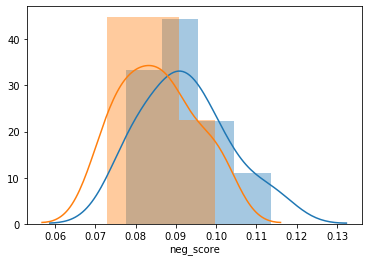

In [23]:
# distribution plot of the negative score
sns.distplot(QT_df['neg_score'])
sns.distplot(disney_df['neg_score'])

In [24]:
stats.levene(QT_df['neg_score'],disney_df['neg_score']) # p-value > 0.05, we regard it has the queal variance

LeveneResult(statistic=0.0036038653544321012, pvalue=0.9527914891381134)

In [25]:
stats.ttest_ind(QT_df['neg_score'],disney_df['neg_score']) # pvalue is 0.15, larger than 0.05, we fail to reject the null hypothesis.

Ttest_indResult(statistic=1.4900812759200774, pvalue=0.15351758148378744)

In [26]:
import pandas as pd 
from pandas import Series,DataFrame
data_p = {'statistic':['0.00362','1.4901'],
        'pvalue':['0.9528','0.1535']
       }
p = DataFrame(data_p, index = ['Levene','Ttest'])
p

,statistic,pvalue
Levene,0.00362,0.9528
Ttest,1.4901,0.1535


### Hypothesis test2: Overtime, the total sentiment score rating has increased for both movie categories.
### Hypothesis test3: The sentiment score calculated by "Harvard IV" and "ANEW" has the same trend.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("NEW_dataframe.csv")

Text(0, 0.5, 'Rating')

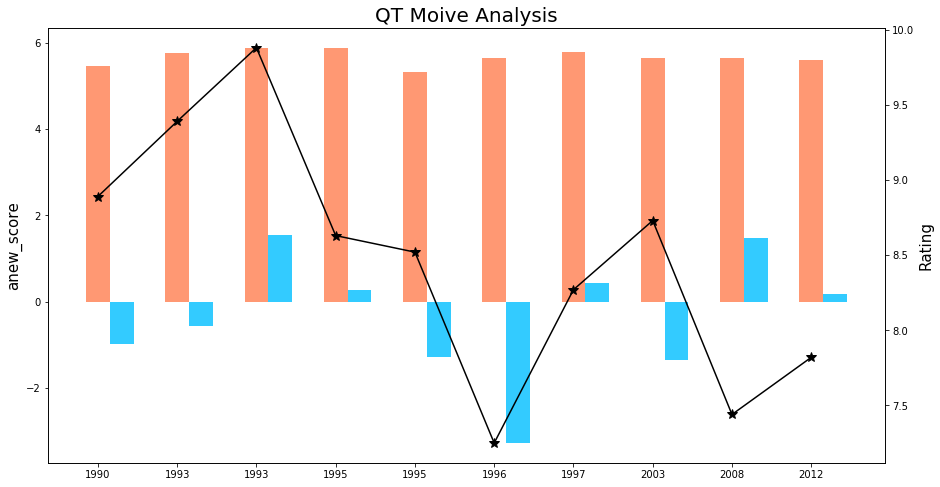

In [29]:
df_qt = df[df.Type == "QT"]
qt_sort =df_qt.sort_values(by="Year",ascending=True)
qt_sort

qt_sen_anew = list(qt_sort["sentiment_score_anew"])
qt_sen_iv = list(qt_sort["sentiment_score_iv"]*100)
year_label = list(qt_sort["Year"])

qt_rating = list(qt_sort["Rating"])
 
x=year_label
y1=qt_sen_anew
y2=qt_sen_iv
bar_width = 0.3
plt.rcParams['figure.figsize'] = (15.0,8.0) 
 
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.bar(x=range(len(x)), height=y1, color='coral', alpha=0.8, width=bar_width)
plt.bar(x=np.arange(len(x)) + bar_width, height=y2, color='deepskyblue', alpha=0.8, width=bar_width)

ax1.set_ylabel('anew_score',fontsize='15')
ax1.set_title("QT Moive Analysis",fontsize='20')  
#plt.yticks(fontsize=15)
plt.xticks(range(len(x)), x)
#plt.xticks(fontsize=15)
 
ax2 = ax1.twinx()
ax2.plot(range(len(x)), qt_rating, 'black', marker='*', ms=10)
ax2.set_ylabel('Rating',fontsize='15')



Text(0, 0.5, 'Rating')

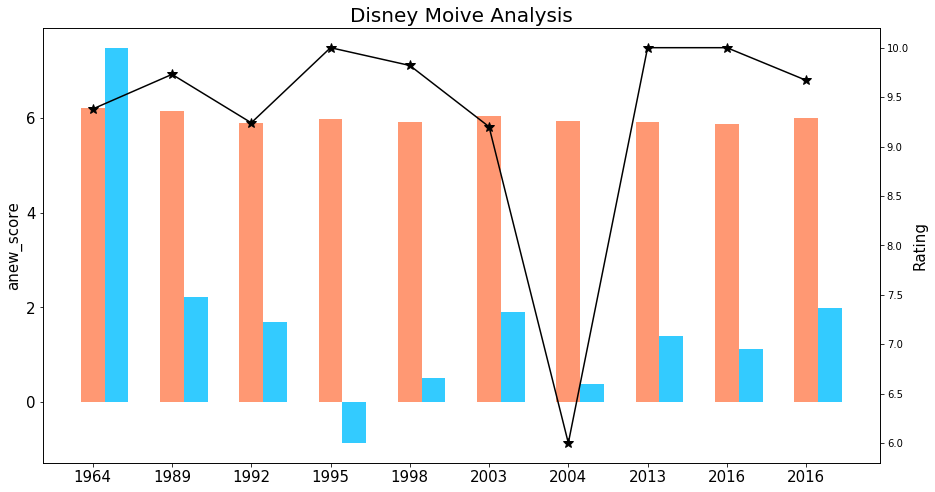

In [30]:
df_dis = df[df.Type != "QT"]
dis_sort =df_dis.sort_values(by="Year",ascending=True)
dis_sort

dis_sen_anew = list(dis_sort["sentiment_score_anew"])
dis_sen_iv = list(dis_sort["sentiment_score_iv"]*100)
year_label = list(dis_sort["Year"])

dis_rating = list(dis_sort["Rating"])
dis_rating
 
x=year_label
y1=dis_sen_anew
y2=dis_sen_iv
bar_width = 0.3
plt.rcParams['figure.figsize'] = (15.0,8.0) 
 
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.bar(x=range(len(x)), height=y1, color='coral', alpha=0.8, width=bar_width)
plt.bar(x=np.arange(len(x)) + bar_width, height=y2, color='deepskyblue', alpha=0.8, width=bar_width)

ax1.set_ylabel('anew_score',fontsize='15')
ax1.set_title("Disney Moive Analysis",fontsize='20')  
plt.yticks(fontsize=15)
plt.xticks(range(len(x)), x)
plt.xticks(fontsize=15)
 
ax2 = ax1.twinx()
ax2.plot(range(len(x)), dis_rating, 'black', marker='*', ms=10)
ax2.set_ylabel('Rating',fontsize='15')

## Regression:
### Topic Modelling:

In [31]:
# ALL：
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import preprocessing



In [32]:
count = CountVectorizer()
count_matrix = count.fit_transform(qt_cleaned_data)


n_components = 20  
n_top_words = 10

def get_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

nmf = NMF(n_components=n_components, random_state=1,alpha=.1, l1_ratio=.5).fit(count_matrix)

cv_feature_names = count.get_feature_names()

get_words(nmf, cv_feature_names, n_top_words)




Topic #0: one like back two know see little go hand would
Topic #1: drschultz big back like one two know nigger horse black
Topic #2: know get like back got one int see go room
Topic #3: back two get one like int see door room cut
Topic #4: get like back one know two gonna got door youre
Topic #5: japanese sword oren yuki cu one back black english go
Topic #6: sex machine door back fuckin get pussy big chet vampires
Topic #7: nazi french cinema back collanda one ltaldo major table donny
Topic #8: drschultz horse nigger slave men big candyland slaves roy greenville
Topic #9: know get back got day like gonna one tell youre
Topic #10: like know get one back int got room youre gonna
Topic #11: room door back one looks youre theodore wife like phone
Topic #12: zzzzzz fourstory flowery flowers flower flow flourishcompletely flourish flour flounder
Topic #13: bag know contd money got get looks back one black
Topic #14: virgil get know day youre like got room nicholson shit
Topic #15: wurlitze

In [33]:
count = CountVectorizer()
count_matrix = count.fit_transform(disney_cleaned_data)


n_components = 20
n_top_words = 10

def get_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

nmf = NMF(n_components=n_components, random_state=1,alpha=.1, l1_ratio=.5).fit(count_matrix)

cv_feature_names = count.get_feature_names()

get_words(nmf, cv_feature_names, n_top_words)

Topic #0: back looks door one like go night know int around
Topic #1: contd back looks day like door love ext int see
Topic #2: shanyu back crikee man chienpo khan looks sword cut look
Topic #3: contd oh little clawhauser big right bunny flash well youre
Topic #4: oh well time yes one see go good say father
Topic #5: hey ha okay right oh get go dad gasps come
Topic #6: michael oh time children step go chim sir diddle well
Topic #7: thou night father close cont ext cut love car laurence
Topic #8: oh get fish one youre gonna little got see look
Topic #9: zut flicks flip flint flings flinging flinches flinch flimsy flight
Topic #10: bill int contd kids house continuous plummer youre principal back
Topic #11: contd int youre later oh little kids looks gonna know
Topic #12: zut flicks flip flint flings flinging flinches flinch flimsy flight
Topic #13: ha oh hey fish get mine dad okay swim gonna
Topic #14: frozen sven lee contd snow arendelle castle right trolls okay
Topic #15: carpet back l

## Machine Learning Analysis:
### 1. Predict if a movie is a Tarantino movie or a Disney movie:

In [55]:
# The whole data:
all_data = qt_data + disney_data # QT + Disney total: 20
# Split data into several small data:
def sp_text(x):
    sen = []
    for i in range(len(x)):
        sen += re.findall(r'.{200}',x[i]) # split the data by the length, each small string length is 200
    return sen

In [56]:
qt_split_data = sp_text(qt_data)
dis_split_data = sp_text(disney_data)

In [57]:
qt_sp_df = pd.DataFrame(qt_split_data)
qt_sp_df.columns = ['Script']
qt_sp_df.insert(0,'Type',"0")
dis_sp_df = pd.DataFrame(dis_split_data)
dis_sp_df.columns = ['Script']
dis_sp_df.insert(0,'Type',"1")
all_sp_df = qt_sp_df.append(dis_sp_df)
all_sp_df.shape

(12418, 2)

In [58]:
from sklearn.model_selection import train_test_split

y_label = [int(yl) for yl in list(all_sp_df.Type)]

#依次导入X， y， test_size split the textual data:
X_train, X_test, y_train, y_test = train_test_split(all_sp_df.Script, y_label, test_size=0.3,stratify=all_sp_df.Type)
# stratify 处理不均衡的数据集

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (2,3),stop_words = 'english')

#fit_transform是fit和transform两种方法的简写
#fit方法用于构建特征空间（构建词典）
#transform方法使用该空间将文本数据转化为特征矩阵
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(8692, 281499)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#用学到的特征空间去对测试集数据进行转换为特征矩阵
X_test_cv = cv.transform(X_test)
#测试集特征矩阵的列数与训练集特征矩阵的列数是一致的，都是19985
X_test_cv
# Navie Bayes:
# 多项式朴素贝叶斯：sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
#这里是有监督的训练模型
#所以要同时输入X_train_cv和y_train
nb.fit(X_train_cv, y_train)
#训练好的模型，对测试集数据进行预测
predicted_cv = nb.predict(X_test_cv)
print(classification_report(y_test, predicted_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2318
           1       0.96      0.88      0.92      1408

    accuracy                           0.94      3726
   macro avg       0.95      0.93      0.94      3726
weighted avg       0.94      0.94      0.94      3726



Text(0.5, 1.0, '$ROC curve$')

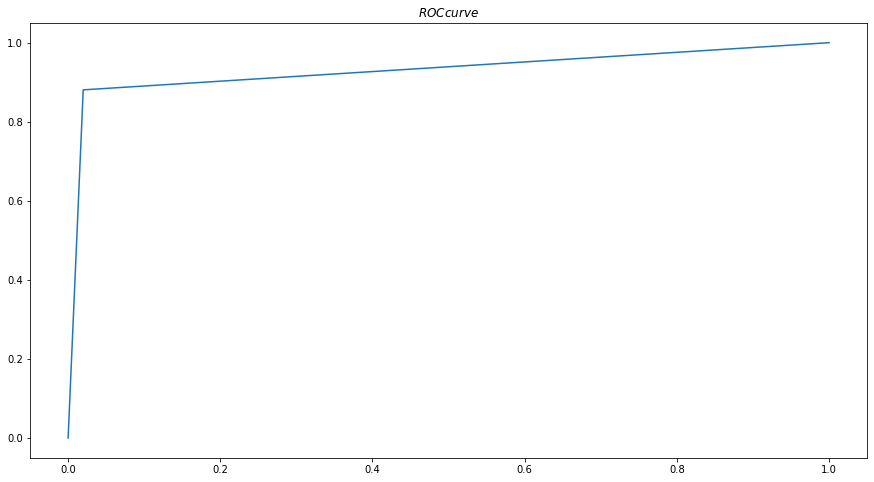

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve

fpr,tpr,thresholds=roc_curve(y_test,predicted_cv)  #计算fpr,tpr,thresholds
auc=roc_auc_score(y_test,predicted_cv) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')

In [62]:
# TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer


tv = TfidfVectorizer(ngram_range = (2,3),stop_words='english')
X_train_tf = tv.fit_transform(X_train)
X_test_tf = tv.transform(X_test)
nb2 = MultinomialNB()
nb2.fit(X_train_tf, y_train)
predicted_tf = nb2.predict(X_test_tf)
print(classification_report(y_test, predicted_tf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2318
           1       0.99      0.58      0.73      1408

    accuracy                           0.84      3726
   macro avg       0.90      0.79      0.81      3726
weighted avg       0.87      0.84      0.83      3726



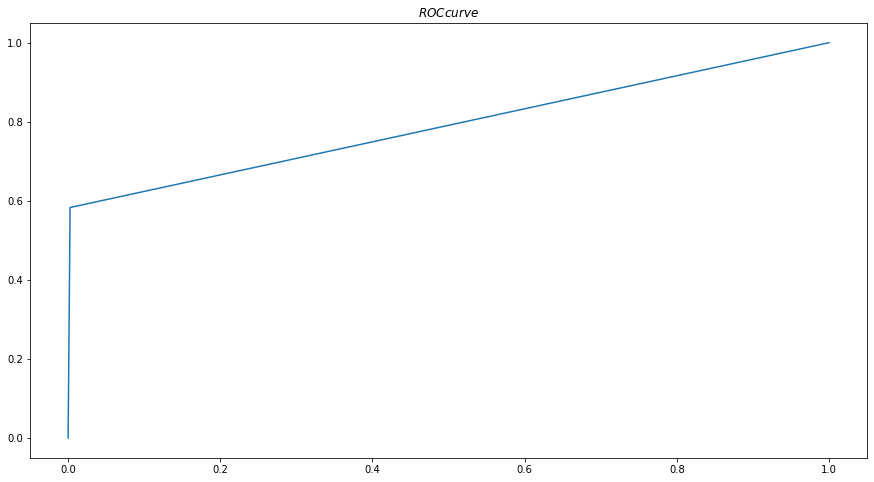

In [63]:
fpr,tpr,thresholds=roc_curve(y_test,predicted_tf)  #计算fpr,tpr,thresholds
auc=roc_auc_score(y_test,predicted_tf) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()

In [64]:
## Logistic Regression: 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

cv = CountVectorizer(ngram_range = (2,3),stop_words='english')
X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)


LR = LogisticRegression()
LR.fit(X_train_counts, y_train)
predicted_lr = LR.predict(X_test_counts)
predicted_lr_pb = LR.predict_proba(X_test_counts)
print(classification_report(y_test, predicted_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2318
           1       1.00      0.42      0.60      1408

    accuracy                           0.78      3726
   macro avg       0.87      0.71      0.72      3726
weighted avg       0.84      0.78      0.75      3726



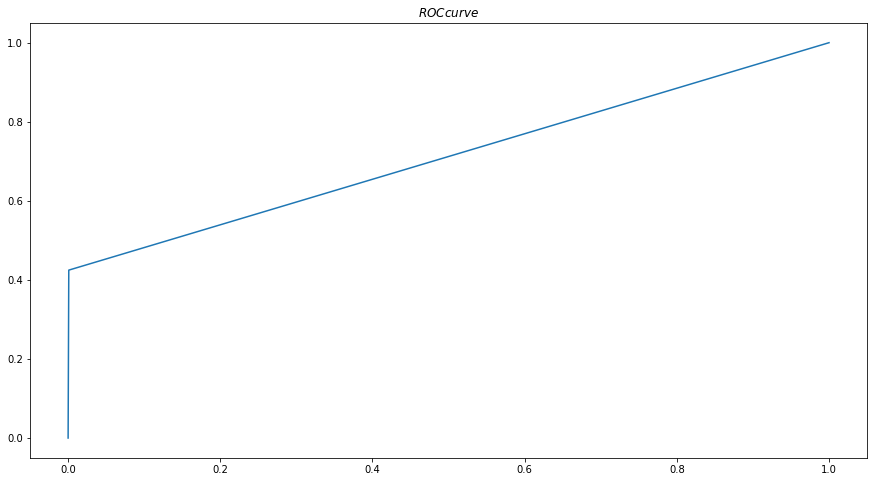

In [65]:
fpr,tpr,thresholds=roc_curve(y_test,predicted_lr)  #计算fpr,tpr,thresholds
auc=roc_auc_score(y_test,predicted_lr) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()

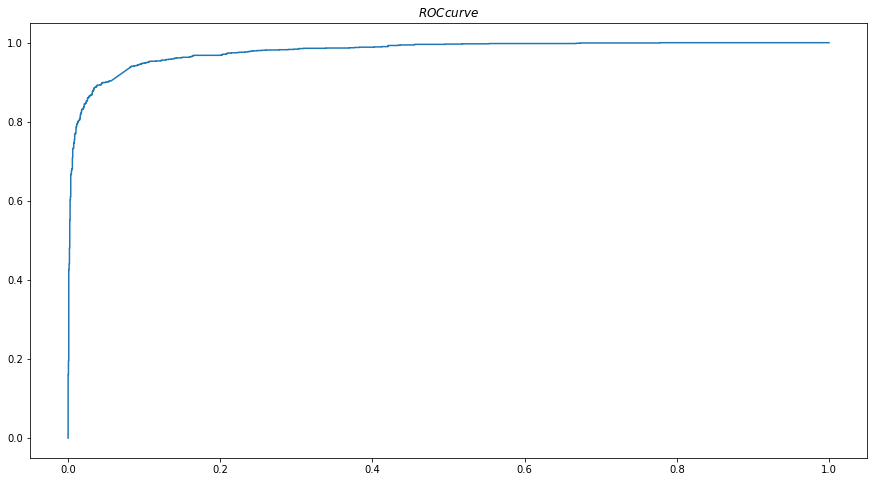

In [66]:
y_0=list(predicted_lr_pb[:,1])
fpr,tpr,thresholds=roc_curve(y_test,y_0)  #计算fpr,tpr,thresholds
auc=roc_auc_score(y_test,y_0) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()

### 2. Predict if a movie is a Action movie or a Musical movie:

In [67]:
mus_df=all_df[all_df['Genres'].str.contains('musical')]
act_df=all_df[all_df['Genres'].str.contains('action')]

mus_sen = mus_df['Script'].tolist()
act_sen = act_df['Script'].tolist()

mus_split_data = sp_text(mus_sen)
act_split_data = sp_text(act_sen)

mus_sp_df = pd.DataFrame(mus_split_data)
mus_sp_df.columns = ['Script']
mus_sp_df.insert(0,'Type',"0")
act_sp_df = pd.DataFrame(act_split_data)
act_sp_df.columns = ['Script']
act_sp_df.insert(0,'Type',"1")
all1_sp_df = mus_sp_df.append(act_sp_df)
all1_sp_df

,Type,Script
0,0,gsavjgecaladdin complete script compiled ben s...
1,0,ntense barbaric heyit home wind back sun west ...
2,0,an moons fool could fall fall hard dunes ah sa...
3,0,y enchantment finest merchandise side river jo...
4,0,s tupperware never seen one intact famous dead...
...,...,...
3405,1,uch wipes face dad would proud bawls ca keep s...
3406,1,ght trained failure option detail small best r...
3407,1,uns sing solve problem like maria von trapp ki...
3408,1,y duck new family adorable ducklings ever saw ...


In [68]:
all1_sp_df.to_csv('a_m_sp.csv') #action musical split sentences dataframe 

In [69]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support


dataset = pd.read_csv('a_m_sp.csv')
X = dataset.Script
y = dataset.Type

#cross-validation 打乱顺序，10等分
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train1, X_test1, y_train1, y_test1 = X[train_index], X[test_index], y[train_index], y[test_index]
    cv = CountVectorizer(ngram_range = (2,3),stop_words='english')
    X_train_counts = cv.fit_transform(X_train1)
    X_test_counts = cv.transform(X_test1)
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train1)
    predicted_clf = clf.predict(X_test_counts)
    p, r, f1, _ = precision_recall_fscore_support(y_test1, predicted_clf, average='macro')
    print("Precision: {0}, Recall: {1}, F1_score: {2}".format(p, r, f1))
    
    


Precision: 0.9053995855848536, Recall: 0.8180635865788585, F1_score: 0.8502393871688478
Precision: 0.9062820430658806, Recall: 0.8262466550020584, F1_score: 0.8567507181615065
Precision: 0.9135802469135803, Recall: 0.8438188213856894, F1_score: 0.870661861074705
Precision: 0.9216480252471342, Recall: 0.8328296149760047, F1_score: 0.8649847940983839
Precision: 0.9071182174156256, Recall: 0.8251489203276248, F1_score: 0.8555015072622636


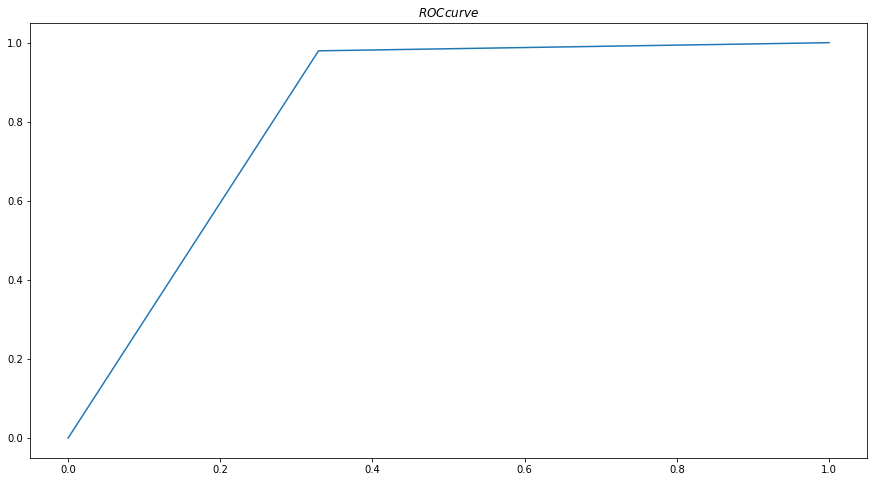

In [70]:
## 有问题！！
fpr,tpr,thresholds=roc_curve(list(y_test1),predicted_clf)  #计算fpr,tpr,thresholds
auc4=roc_auc_score(list(y_test1),predicted_clf) #计算auc

#画曲线图
plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()

In [51]:
auc4

0.9650846468879472

In [ ]:
#Not useful:
# kmeans:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import preprocessing


X1_train, X1_test, y1_train, y1_test = train_test_split(all1_sp_df.Script, all1_sp_df.Type, test_size=0.3)

# 这里将特征空间压缩到200维，也就是只要200个词语作为特征词
cv1 = CountVectorizer(max_features=200)
X1_train_counts = cv1.fit_transform(X1_train)
X1_test_counts = cv1.transform(X1_test)
X1_train_counts


km=KMeans(n_clusters=2).fit(X1_train_counts)